# `Funding info` Spreadsheet

## First steps: Profiling report

In [1]:
import collections
import itertools

import numpy as np
import pandas as pd
import pandas_profiling
import missingno as msno

import cufflinks as cf
import plotly.plotly as py
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

import os
os.environ['PROJ_LIB'] = 'C:\\ProgramData\\Anaconda3\\Library\\share'

from mpl_toolkits.basemap import Basemap

In [2]:
funding = pd.read_excel('Desktop/2H_2018_India_Investments.xlsx', sheet_name=0)
funding.columns = funding.columns.str.replace(' ', '_')
funding.head()

,Transaction_Name,Transaction_Name_URL,Organization_Name,Organization_Name_URL,Funding_Type,Money_Raised,Money_Raised_Currency,Money_Raised_Currency_(in_USD),Announced_Date,Organization_Description,...,Number_of_Funding_Rounds,Lead_Investors,Investor_Names,Number_of_Investors,Number_of_Partner_Investors,Funding_Stage,Pre-Money_Valuation,Pre-Money_Valuation_Currency,Pre-Money_Valuation_Currency_(in_USD),Equity_Only_Funding
0,Seed Round - OKCredit,https://www.crunchbase.com/funding_round/okcre...,OKCredit,https://www.crunchbase.com/organization/okcred...,Seed,1.700000e+06,USD,1.700000e+06,2018-08-22,OKCredit simplifies credit account management ...,...,2,NaN,"Lightspeed India Partners, Venture Highway, Y ...",3.0,NaN,Seed,NaN,NaN,NaN,Yes
1,Corporate Round - Max Healthcare,https://www.crunchbase.com/funding_round/max-h...,Max Healthcare,https://www.crunchbase.com/organization/max-he...,Corporate Round,NaN,NaN,NaN,2018-09-19,Max Healthcare is one of the leading chain of ...,...,2,Radiant Life Care Private Ltd,Radiant Life Care Private Ltd,1.0,NaN,NaN,NaN,NaN,NaN,Yes
2,Series H - Swiggy,https://www.crunchbase.com/funding_round/swigg...,Swiggy,https://www.crunchbase.com/organization/swiggy,Series H,1.000000e+09,USD,1.000000e+09,2018-12-20,Swiggy is a food ordering and delivery company...,...,9,Naspers,"Coatue Management, DST Global, Hillhouse Capit...",7.0,NaN,Late Stage Venture,2.300000e+09,USD,2.300000e+09,Yes
3,Corporate Round - Billdesk,https://www.crunchbase.com/funding_round/billd...,Billdesk,https://www.crunchbase.com/organization/billdesk,Corporate Round,6.020000e+09,INR,8.386158e+07,2018-11-16,"BillDesk, a property of IndiaIdeas.com Ltd. wa...",...,4,Visa,"Clearstone Venture Partners, General Atlantic,...",5.0,NaN,NaN,1.445000e+09,USD,1.445000e+09,Yes
4,Series C - ERUDITUS Executive Education,https://www.crunchbase.com/funding_round/erudi...,ERUDITUS Executive Education,https://www.crunchbase.com/organization/erudit...,Series C,4.000000e+07,USD,4.000000e+07,2018-11-30,"Eruditus, promoted by Alumni of INSEAD and oth...",...,4,Sequoia Capital India,"Bertelsmann India Investments, Sequoia Capital...",2.0,NaN,Late Stage Venture,NaN,NaN,NaN,Yes


In [3]:
# Generate HTML of the above profiling report
#profile_funding = funding.profile_report(title='Funding Sheet Profiling Report')
#profile_funding.to_file(output_file='funding.html')
print('Done!')

Done!


Go to [link](https://sinablk.github.io/funding) to see the full profiling report.

## Cleaning up the data

As can be seen, the current `funding` dataframe contains several columns that are not needed in this analysis. So we'll selectively drop them. Also many of the columns contain large number of NaNs rendering them useless for analysis. We'll drop them as well.

In [4]:
funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 28 columns):
Transaction_Name                          594 non-null object
Transaction_Name_URL                      594 non-null object
Organization_Name                         594 non-null object
Organization_Name_URL                     594 non-null object
Funding_Type                              594 non-null object
Money_Raised                              428 non-null float64
Money_Raised_Currency                     428 non-null object
Money_Raised_Currency_(in_USD)            428 non-null float64
Announced_Date                            594 non-null datetime64[ns]
Organization_Description                  594 non-null object
Organization_Categories                   594 non-null object
Organization_Location                     594 non-null object
Organization_Website                      588 non-null object
Organization_Revenue_Range                244 non-null object
Total_Funding_Amo

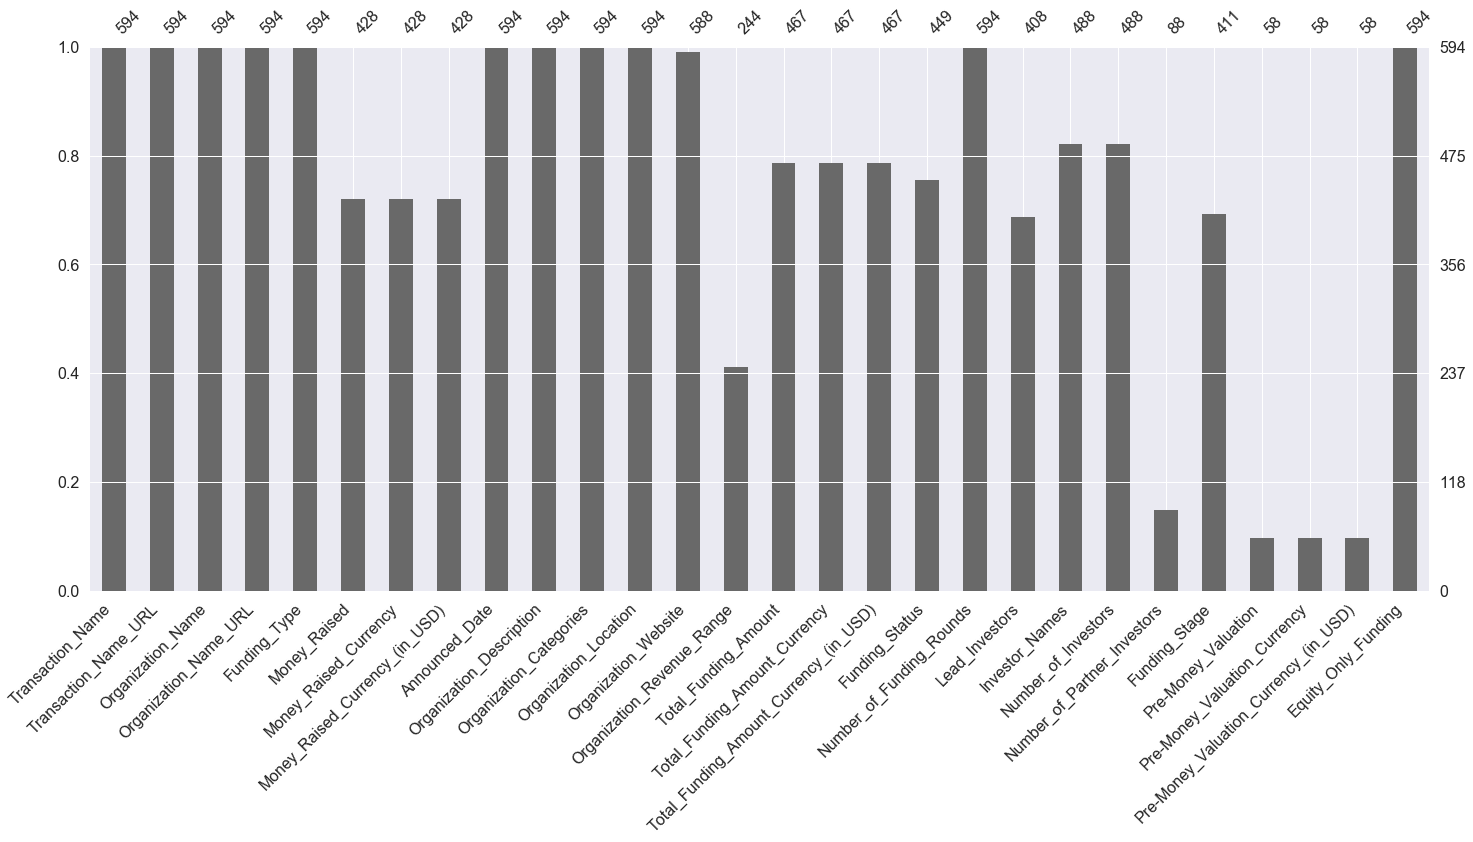

In [5]:
# Looking at NaNs
msno.bar(funding)

In [6]:
# Drop columns selectively
funding.drop(['Transaction_Name', 'Transaction_Name_URL', 'Organization_Name_URL', 'Money_Raised', 'Money_Raised_Currency',
             'Organization_Description', 'Organization_Website', 'Total_Funding_Amount', 'Total_Funding_Amount_Currency',
              'Number_of_Partner_Investors', 'Pre-Money_Valuation', 'Pre-Money_Valuation_Currency',
             'Pre-Money_Valuation_Currency_(in_USD)'], axis=1, inplace=True)
funding.head()

,Organization_Name,Funding_Type,Money_Raised_Currency_(in_USD),Announced_Date,Organization_Categories,Organization_Location,Organization_Revenue_Range,Total_Funding_Amount_Currency_(in_USD),Funding_Status,Number_of_Funding_Rounds,Lead_Investors,Investor_Names,Number_of_Investors,Funding_Stage,Equity_Only_Funding
0,OKCredit,Seed,1.700000e+06,2018-08-22,"Finance, Financial Exchanges, Financial Servic...","Faridabad, Haryana, India, Asia",NaN,1.720000e+07,Early Stage Venture,2,NaN,"Lightspeed India Partners, Venture Highway, Y ...",3.0,Seed,Yes
1,Max Healthcare,Corporate Round,NaN,2018-09-19,"Health Care, Hospital, Supply Chain Management","New Delhi, Delhi, India, Asia",$10M to $50M,NaN,NaN,2,Radiant Life Care Private Ltd,Radiant Life Care Private Ltd,1.0,NaN,Yes
2,Swiggy,Series H,1.000000e+09,2018-12-20,"Food Delivery, Food Processing, Internet","Bangalore, Karnataka, India, Asia",$10M to $50M,1.465500e+09,Late Stage Venture,9,Naspers,"Coatue Management, DST Global, Hillhouse Capit...",7.0,Late Stage Venture,Yes
3,Billdesk,Corporate Round,8.386158e+07,2018-11-16,"Finance, FinTech, Payments, Property Developme...","Ahmedabad, Gujarat, India, Asia",NaN,2.413616e+08,NaN,4,Visa,"Clearstone Venture Partners, General Atlantic,...",5.0,NaN,Yes
4,ERUDITUS Executive Education,Series C,4.000000e+07,2018-11-30,"Continuing Education, EdTech, Education, Skill...","Mumbai, Maharashtra, India, Asia",$1M to $10M,5.046798e+07,Late Stage Venture,4,Sequoia Capital India,"Bertelsmann India Investments, Sequoia Capital...",2.0,Late Stage Venture,Yes


In [7]:
funding.head()

,Organization_Name,Funding_Type,Money_Raised_Currency_(in_USD),Announced_Date,Organization_Categories,Organization_Location,Organization_Revenue_Range,Total_Funding_Amount_Currency_(in_USD),Funding_Status,Number_of_Funding_Rounds,Lead_Investors,Investor_Names,Number_of_Investors,Funding_Stage,Equity_Only_Funding
0,OKCredit,Seed,1.700000e+06,2018-08-22,"Finance, Financial Exchanges, Financial Servic...","Faridabad, Haryana, India, Asia",NaN,1.720000e+07,Early Stage Venture,2,NaN,"Lightspeed India Partners, Venture Highway, Y ...",3.0,Seed,Yes
1,Max Healthcare,Corporate Round,NaN,2018-09-19,"Health Care, Hospital, Supply Chain Management","New Delhi, Delhi, India, Asia",$10M to $50M,NaN,NaN,2,Radiant Life Care Private Ltd,Radiant Life Care Private Ltd,1.0,NaN,Yes
2,Swiggy,Series H,1.000000e+09,2018-12-20,"Food Delivery, Food Processing, Internet","Bangalore, Karnataka, India, Asia",$10M to $50M,1.465500e+09,Late Stage Venture,9,Naspers,"Coatue Management, DST Global, Hillhouse Capit...",7.0,Late Stage Venture,Yes
3,Billdesk,Corporate Round,8.386158e+07,2018-11-16,"Finance, FinTech, Payments, Property Developme...","Ahmedabad, Gujarat, India, Asia",NaN,2.413616e+08,NaN,4,Visa,"Clearstone Venture Partners, General Atlantic,...",5.0,NaN,Yes
4,ERUDITUS Executive Education,Series C,4.000000e+07,2018-11-30,"Continuing Education, EdTech, Education, Skill...","Mumbai, Maharashtra, India, Asia",$1M to $10M,5.046798e+07,Late Stage Venture,4,Sequoia Capital India,"Bertelsmann India Investments, Sequoia Capital...",2.0,Late Stage Venture,Yes


It's much more convenient to turn this dataframe into a time-series, which we can later plot to see chronological trends.

In [8]:
# Set the "Announced_Date" as the index
funding.set_index('Announced_Date', inplace=True)

# Sort the dataframe according to the new date index column
funding.sort_values(by=['Announced_Date'], inplace=True)

In [9]:
# Double-check data
funding.head()

,Organization_Name,Funding_Type,Money_Raised_Currency_(in_USD),Organization_Categories,Organization_Location,Organization_Revenue_Range,Total_Funding_Amount_Currency_(in_USD),Funding_Status,Number_of_Funding_Rounds,Lead_Investors,Investor_Names,Number_of_Investors,Funding_Stage,Equity_Only_Funding
Announced_Date,,,,,,,,,,,,,,
2018-07-01,Financial Power Software Technology Private Ltd,Angel,NaN,"Cloud Computing, FinTech, Information Technolo...","Raipur, Chhattisgarh, India, Asia",NaN,NaN,Seed,1,NaN,NaN,NaN,Seed,Yes
2018-07-01,Keeros,Angel,437668.0,"Food and Beverage, Food Delivery, Snack Food","Lucknow, Uttar Pradesh, India, Asia",NaN,437668.0,Seed,1,NaN,Venture Catalysts,1.0,Seed,Yes
2018-07-01,Ziligence,Pre-Seed,125000.0,"Artificial Intelligence, Business Development,...","Gurgaon, Haryana, India, Asia",Less than $1M,125000.0,Seed,1,NaN,NaN,NaN,Seed,Yes
2018-07-01,Prozo.com,Venture - Series Unknown,790000.0,"B2B, E-Commerce, Retail Technology, SaaS, Supp...","New Delhi, Delhi, India, Asia",$1M to $10M,2000155.0,NaN,3,NaN,NaN,NaN,NaN,Yes
2018-07-01,Rish Designs,Seed,NaN,"E-Commerce, Graphic Design, Information Techno...","Kanpur, Uttar Pradesh, India, Asia",NaN,NaN,Seed,1,NaN,NaN,NaN,Seed,Yes


In [10]:
funding.tail()

,Organization_Name,Funding_Type,Money_Raised_Currency_(in_USD),Organization_Categories,Organization_Location,Organization_Revenue_Range,Total_Funding_Amount_Currency_(in_USD),Funding_Status,Number_of_Funding_Rounds,Lead_Investors,Investor_Names,Number_of_Investors,Funding_Stage,Equity_Only_Funding
Announced_Date,,,,,,,,,,,,,,
2018-12-27,Tranzmeo,Pre-Seed,140000.0,"Artificial Intelligence, Business Intelligence...","Cochin, Kerala, India, Asia",NaN,187000.0,Seed,3,Hindustan Petroleum Corporation Limited,Hindustan Petroleum Corporation Limited,1.0,Seed,Yes
2018-12-27,Studds Accessories,Private Equity,14286734.0,E-Commerce,"Faridabad, Haryana, India, Asia",NaN,14286734.0,Private Equity,1,NaN,NaN,NaN,Private Equity,Yes
2018-12-27,FabAlley,Series B,8572040.0,"E-Commerce, Fashion, Lifestyle","Noida, Uttar Pradesh, India, Asia",$1M to $10M,11354545.0,Early Stage Venture,4,SAIF Partners,"Indian Angel Network, SAIF Partners",2.0,Early Stage Venture,Yes
2018-12-29,Asteria Aerospace,Seed,NaN,Aerospace,"Bangalore, Karnataka, India, Asia",NaN,NaN,Seed,1,Boundary Holding,Boundary Holding,1.0,Seed,Yes
2018-12-31,WHR,Seed,143145.0,"Health Care, Information Technology, Software","Pune, Maharashtra, India, Asia",NaN,293145.0,Seed,3,NaN,NaN,NaN,Seed,Yes


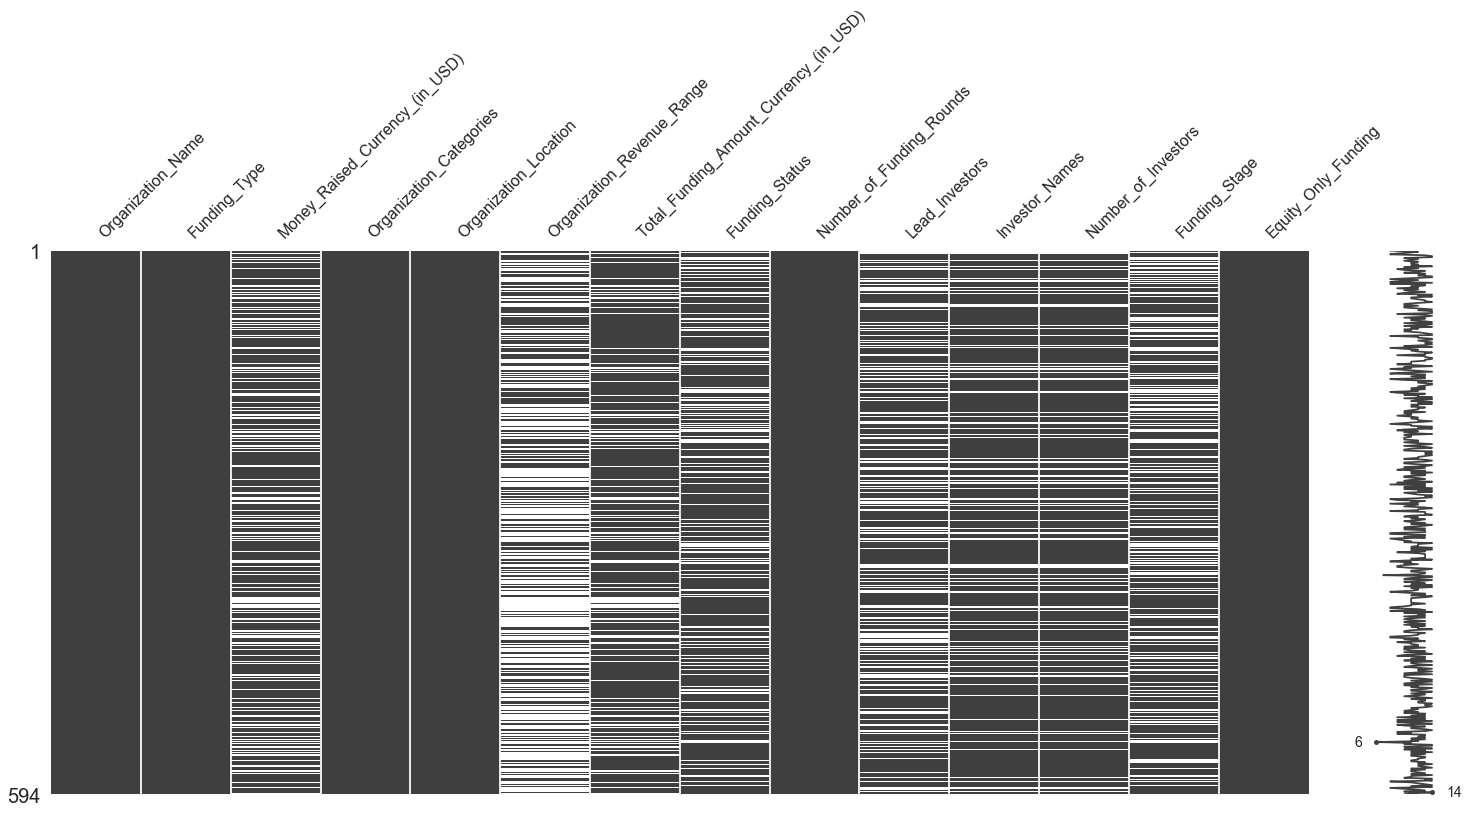

In [11]:
msno.matrix(funding)

## Plotting

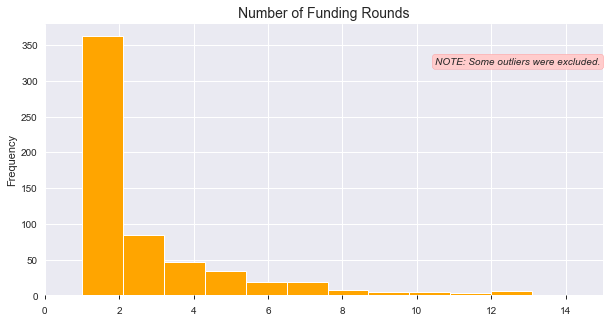

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
funding['Number_of_Funding_Rounds'].hist(bins=20, color='orange', edgecolor='white', linewidth=1)
plt.title('Number of Funding Rounds', size=14)
plt.ylabel('Frequency')
sns.despine(left=False,bottom=False)
sns.set_style('ticks')
ax.tick_params(axis='y', length=0)
plt.xlim(0, 15)
plt.text(x=0.7, y=0.85, s='NOTE: Some outliers were excluded.', fontstyle='italic', transform=ax.transAxes,
        bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.show()

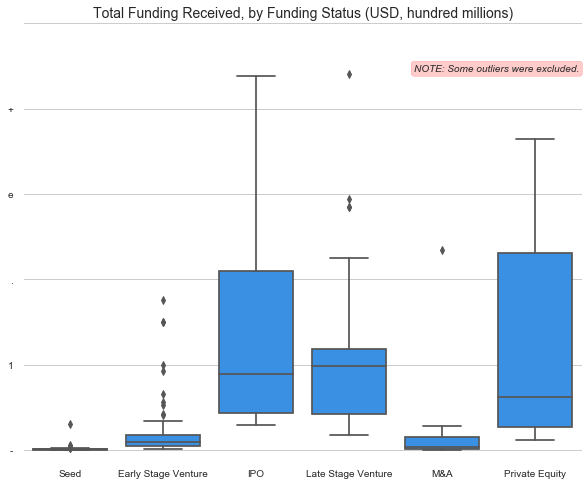

<Figure size 432x288 with 0 Axes>

In [123]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x='Funding_Status', y='Total_Funding_Amount_Currency_(in_USD)', data=funding, color='dodgerblue', ax=ax)
plt.xlabel('')
plt.ylabel('')
plt.title('Total Funding Received, by Funding Status (USD, hundred millions)', size=14)
plt.text(x=0.7, y=0.89, s='NOTE: Some outliers were excluded.', fontstyle='italic', transform=ax.transAxes,
        bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
plt.ylim(-1e7, 0.5e9)
vals = ax.get_yticks()
ax.set_yticklabels([x.rstrip('0') for x in str(vals)])
plt.show()
sns.despine(left=False)
sns.set_style('whitegrid', {'axes.grid': True})

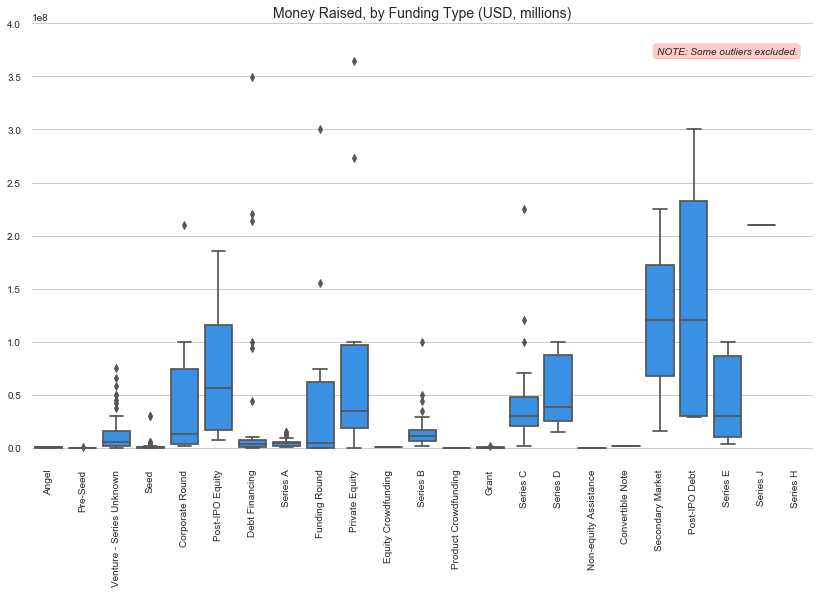

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
ax = sns.boxplot(x='Funding_Type', y='Money_Raised_Currency_(in_USD)', data=funding, color='dodgerblue')
plt.ylabel('In USD, millions')
plt.xlabel('')
plt.ylabel('')
plt.title('Money Raised, by Funding Type (USD, millions)', size=14)
plt.ylim(-1e7,0.4e9)
plt.xticks(rotation=90)
plt.text(x=0.8, y=0.93, s='NOTE: Some outliers excluded.', fontstyle='italic', transform=ax.transAxes,
        bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
sns.set_style('whitegrid')

In [15]:
funding.iplot(kind='bar',y='Total_Funding_Amount_Currency_(in_USD)', title='PE/VC Funding Amount Secured (USD, billions)')

In [16]:
funding_type = funding['Funding_Type'].value_counts()
funding_type.iplot(kind='bar', yTitle='Frequency', title='Funding Type')

In [17]:
funding_status = funding['Funding_Status'].value_counts()
funding_status.iplot(kind='bar', yTitle='Frequency', title='Funding Status')

In [18]:
funding_status

Seed                   256
Early Stage Venture    100
Late Stage Venture      54
Private Equity          20
M&A                     10
IPO                      9
Name: Funding_Status, dtype: int64

In [19]:
org_categories = collections.Counter(itertools.chain.from_iterable(value.split(', ') 
                                                                   for value in funding['Organization_Categories']))
org_categories = pd.DataFrame.from_dict(org_categories, orient='index').sort_values(by=[0], ascending=False)[:10]
org_categories.iplot(kind='bar', yTitle='Frequency', title='Top Industries')

In [20]:
investors = collections.Counter(itertools.chain.from_iterable(value.split(', ') 
                                                              for value in funding['Investor_Names'].fillna('')))
investors = pd.DataFrame.from_dict(investors, orient='index').sort_values(by=[0], ascending=False)[1:10]
investors.iplot(kind='bar', yTitle='Frequency', title='Top Investors')

## Geographic distribution

In [21]:
# Get all the city names
cities = funding['Organization_Location'].apply(lambda x: x.split(',')[0])

In [22]:
# Bengaluru and Bangalore are both same city with difference spellings. Replace with a consistent name:
cities.replace(to_replace=['Bengaluru', 'Bangalore City'], value='Bangalore', inplace=True)

In [23]:
# Plot with Cufflinks
cities.value_counts()[:20].iplot(kind='bar', yTitle='Frequency', title='Top Cities by Number of Companies')

In [24]:
# Getting the data ready for geospatial plotting
india_cities = pd.read_csv('Desktop/india_cities.csv')
india_cities = india_cities[['name_of_city', 'location']]
india_cities.head()

,name_of_city,location
0,Abohar,"30.1452928,74.1993043"
1,Achalpur,"21.257584,77.5086754"
2,Adilabad,"19.0809075,79.560344"
3,Adityapur,"22.7834741,86.1576889"
4,Adoni,"15.6322227,77.2728368"


In [25]:
# Getting the latitude and longtitude values of each city
india_cities['lat'] = india_cities['location'].apply(lambda x: x.split(',')[0])
india_cities['lon'] = india_cities['location'].apply(lambda x: x.split(',')[1])
india_cities.drop('location', axis=1, inplace=True)

# name_of_city has trailing spaces. Remove:
india_cities['name_of_city'] = india_cities['name_of_city'].str.strip()

india_cities.head()

,name_of_city,lat,lon
0,Abohar,30.1452928,74.1993043
1,Achalpur,21.257584,77.5086754
2,Adilabad,19.0809075,79.560344
3,Adityapur,22.7834741,86.1576889
4,Adoni,15.6322227,77.2728368


In [26]:
no_companies_in_cities = cities.value_counts()

In [27]:
df = india_cities.merge(no_companies_in_cities, left_on='name_of_city', right_on=cities.value_counts().index)
df.rename(columns={'Organization_Location': 'no_of_companies'}, inplace=True)
df

,name_of_city,lat,lon,no_of_companies
0,Ahmedabad,23.022505,72.5713621,11
1,Alwar,27.5529907,76.6345735,1
2,Anand,22.5645175,72.928871,1
3,Bahadurgarh,28.6924464,76.9239727,1
4,Belgaum,15.8496953,74.4976741,1
5,Bangalore,12.9716,77.5946,160
6,Bhopal,23.2599333,77.412615,2
7,Chandigarh,30.7333148,76.7794179,1
8,Chennai,13.0826802,80.2707184,21
9,Coimbatore,11.0168445,76.9558321,1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



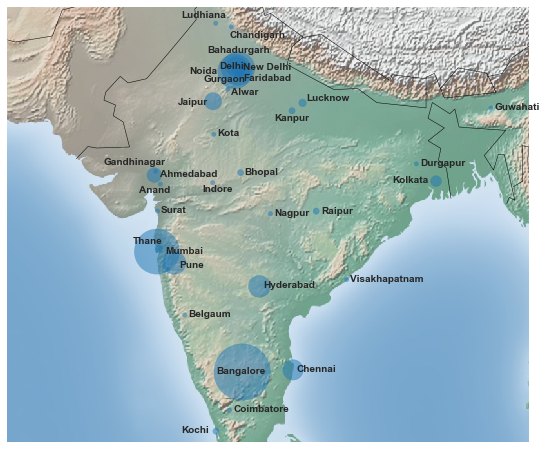

In [28]:
lon, lat, no_of_companies = df['lon'].values, df['lat'].values, df['no_of_companies'].values

# Create the background map
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
           lat_0=20.59, lon_0=78.96, 
           width=3E6, height=2.5E6)
m.drawcountries(color='black')
m.shadedrelief()

# Drawing the data points
m.scatter(lon, lat, latlon=True,
         s=no_of_companies*20, cmap='Reds', alpha=0.5)

# Labelling cities
labels = df['name_of_city'].values
x, y = m(lon, lat)

# hand-crafted offsets
x_offsets = [30000, 20000, -120000, -150000, 20000,
       -150000, 20000, -10000, 20000, 20000,
       -100000, 20000, 20000, -300000, 20000,
       45000, -180000, 20000, -60000, -200000, -100000,
       -200000, -250000, 20000, 20000, -200000, 20000,
       30000, -300000, 30000, 30000, 20000, -150000,
       20000]
y_offsets = [-10000, -30000, -50000, 80000, -10000,
       -10000, -10000, -60000, -10000, -10000,
       -10000, -10000, -50000, 40000, -10000,
       -10000, -60000, -10000, -50000, -20000, -60000,
       -10000, -10000, -10000, 10000, 30000, -10000,
       -10000, -20000, -30000, -15000, -10000, 30000,
       -10000]

for label, xpt, ypt, x_offset, y_offset in zip(labels, x, y, x_offsets, y_offsets):
    plt.text(xpt+x_offset, ypt+y_offset, label, weight='bold')
plt.show()

## Summary

In [29]:
funding.describe()

,Money_Raised_Currency_(in_USD),Total_Funding_Amount_Currency_(in_USD),Number_of_Funding_Rounds,Number_of_Investors
count,4.280000e+02,4.670000e+02,594.000000,488.000000
mean,2.602831e+07,7.965470e+07,2.797980,2.206967
std,9.278565e+07,3.836668e+08,2.679558,1.707633
min,1.358000e+03,1.358000e+03,1.000000,1.000000
25%,4.711645e+05,6.237260e+05,1.000000,1.000000
50%,2.000000e+06,4.138655e+06,2.000000,1.000000
75%,1.200000e+07,3.204149e+07,3.000000,3.000000
max,1.000000e+09,4.713417e+09,23.000000,11.000000


***
# `Company info` sheet analysis

In [30]:
company = pd.read_excel('Desktop/2H_2018_India_Investments.xlsx', sheet_name=1)
company.columns = company.columns.str.replace(' ', '_')
company.head()

,Organization_Name,Organization_Name_URL,Categories,Founded_Date,Founded_Date_Precision,Company_Type,Founders,Number_of_Employees,Number_of_Founders,Last_Funding_Date
0,Ola,https://www.crunchbase.com/organization/ola,"Apps, E-Commerce, Internet, Mobile, Ride Shari...",2010-12-03,day,For Profit,"Ankit Bhati, Bhavish Aggarwal",5001-10000,2.0,2019-03-18
1,Meesho,https://www.crunchbase.com/organization/meesho,"E-Commerce, E-Commerce Platforms, Internet, Mo...",2015-01-01,year,For Profit,"Sanjeev Barnwal, Vidit Aatrey",1950-11-01 00:00:00,2.0,2019-06-14
2,Zomato,https://www.crunchbase.com/organization/zomato,"Food Delivery, Hospitality, Reservations, Rest...",2008-07-10,day,For Profit,"Deepinder Goyal, Pankaj Chaddah",1001-5000,2.0,2019-03-01
3,Dunzo,https://www.crunchbase.com/organization/dunzo,"Automotive, Customer Service, Messaging, Mobil...",2015-01-01,year,For Profit,"Ankur Aggarwal, Dalvir Suri, Kabeer Biswas, Mu...",101-250,4.0,2019-06-21
4,Ninjacart,https://www.crunchbase.com/organization/ninjacart,"AgTech, B2B, Marketing, Sales, Supply Chain Ma...",2015-07-01,month,For Profit,"Ashutosh Vikram, Kartheeswaran K K, Sharath Lo...",1001-5000,5.0,2019-06-21


In [31]:
# Generate HTML of the profiling report
#profile_company = company.profile_report(title='Company Sheet Profiling Report')
#profile_company.to_file(output_file='company.html')
print('Done!')

Done!
